In [3]:
import pymongo 
import math

# define the client, the database, and the collection
# the database and the collection are created at first insert 
# if needed
client = pymongo.MongoClient('localhost',27017)
mydb = client["test"]
sinfun = mydb["sin"]

print('insert')
data = []
for i in range(100):
    x = i/10.
    y = math.sin(x)
    data.append({'x':x,'y':y})
# the list of records is written to the database in one go:
sinfun.insert_many(data)
print('done')

insert
done


Analyse de données depuis mongodb avec pandas

In [4]:
import pymongo
client = pymongo.MongoClient('localhost')
sinfun = client.test.sin
sinfun.find_one()

{'_id': ObjectId('615f794c4fe18085eda012dc'), 'x': 0.0, 'y': 0.0}

In [5]:
import pandas as pd
cursor = sinfun.find()
entries = list(cursor)
entries[:5]

[{'_id': ObjectId('615f794c4fe18085eda012dc'), 'x': 0.0, 'y': 0.0},
 {'_id': ObjectId('615f794c4fe18085eda012dd'),
  'x': 0.1,
  'y': 0.09983341664682815},
 {'_id': ObjectId('615f794c4fe18085eda012de'),
  'x': 0.2,
  'y': 0.19866933079506122},
 {'_id': ObjectId('615f794c4fe18085eda012df'),
  'x': 0.3,
  'y': 0.29552020666133955},
 {'_id': ObjectId('615f794c4fe18085eda012e0'),
  'x': 0.4,
  'y': 0.3894183423086505}]

In [6]:
df = pd.DataFrame(entries)
df.head()

,_id,x,y
0,615f794c4fe18085eda012dc,0.0,0.000000
1,615f794c4fe18085eda012dd,0.1,0.099833
2,615f794c4fe18085eda012de,0.2,0.198669
3,615f794c4fe18085eda012df,0.3,0.295520
4,615f794c4fe18085eda012e0,0.4,0.389418


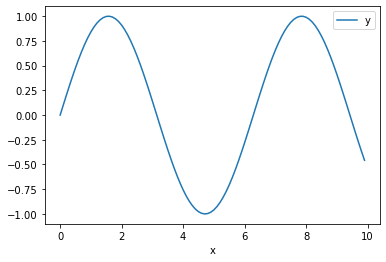

In [7]:
df.plot('x')